# DIVAnd data preparation for the Azores region

This example downloads temperature from World Ocean Database (WOD)
given a certain boundary box and time range by simulating a request
made on the page:
https://www.ncei.noaa.gov/access/world-ocean-database-select/dbsearch.html

In [1]:
using DIVAnd
using Dates
using Downloads: download
using PhysOcean
using PyPlot
using Statistics

Bounding box corresponding to the Azores region

In [2]:
lonr = [-33, -24]
latr = [33.0, 40.0]

2-element Vector{Float64}:
 33.0
 40.0

Time range (start, end)
DateTime requires the year, month, day (and optionally hours, minutes, seconds)

In [3]:
timer = [DateTime(2010,1,1),DateTime(2014,12,31)]

2-element Vector{DateTime}:
 2010-01-01T00:00:00
 2014-12-31T00:00:00

Directory for the WOD files

In [4]:
WODdir = "WOD"

"WOD"

Replace this by your emails address, so that the following reads if you
download the data from World Ocean Database:
```julia
email = "you@email.com"
```

In [5]:
email = ""

""

The name of the variable. The list of all names is available when you execute
`?WorldOceanDatabase.download`

In [6]:
WODname = "Temperature"
fname = "Azores-WOD-Temperature.nc"

"Azores-WOD-Temperature.nc"

In the interest of time, the following is disabled

```julia
WorldOceanDatabase.download(lonr,latr,timer,WODname,email,WODdir)
# Load the variable as Float64 (except the time and identifier which are `DateTime`s and `String`s). Only data flagged as accepted will be loaded.
obsvalue,obslon,obslat,obsdepth,obstime,obsids  = WorldOceanDatabase.load(Float64,WODdir,WODname);
# Save the data in a single NetCDF file for quick access
isfile(fname) && rm(fname)
DIVAnd.saveobs(fname,WODname,obsvalue,(obslon,obslat,obsdepth,obstime),obsids)
```

In [7]:
if !isfile(fname)
    download("https://dox.ulg.ac.be/index.php/s/W5jIFPjXfSanRiO/download",fname)
else
    @info("Data file already downloaded")
end

[ Info: Data file already downloaded


In [8]:
varname = "Temperature"
obsval,obslon,obslat,obsdepth,obstime,obsid = DIVAnd.loadobs(Float64,fname,varname);

Extract the bathymetry for plotting

In [9]:
bathname = "gebco_30sec_16.nc"
bathisglobal = true
if !isfile(bathname)
    download("https://dox.ulg.ac.be/index.php/s/U0pqyXhcQrXjEUX/download",bathname)
else
    @info("Bathymetry file already downloaded")
end
bx,by,b = DIVAnd.extract_bath(bathname,bathisglobal,lonr,latr);

[ Info: Bathymetry file already downloaded


Spatial distrution of surface data.
Adjust the month for a different month range

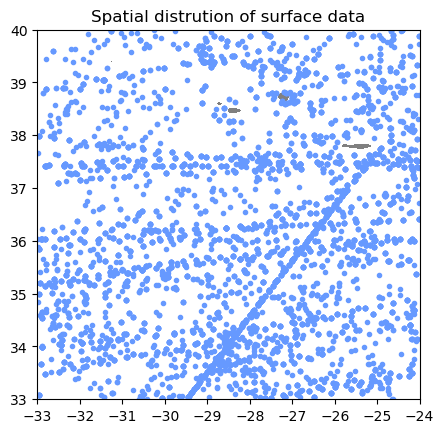

In [10]:
figure()
sel = (obsdepth .< 5) .& (1 .<= Dates.month.(obstime) .<= 12)
plot(obslon[sel],obslat[sel],".",color="#6699ff")
contourf(bx,by,b', levels = [-1e5,0],colors = [[.5,.5,.5]])
xlim(lonr)
ylim(latr)
gca().set_aspect(1/cosd(mean(by)))
title("Spatial distrution of surface data");

Number of data points per year

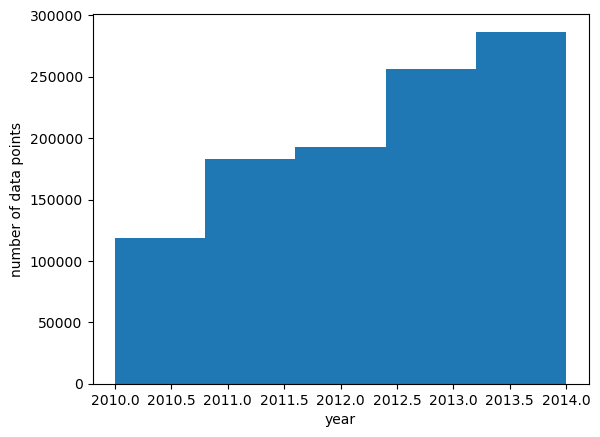

In [11]:
figure()
hist(Dates.year.(obstime),5)
xlabel("year")
ylabel("number of data points");